# Neural Network from sklearn
Conny Lin | June 15, 2020 | updated June 18, 2020

[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


In [1]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import brainstation_capstone
# import other standard paths and local variables
import brainstation_capstone
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
datapath = localpaths['datapath']

# import standard libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# import local libraries using host specific paths

getting host computer specific paths


In [4]:
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

loading 4 files
loading completed


Try a simple NN from sklearn. But usually won't use this package. Normally use packages like *Keras*, *TensorFlow*, *PyTorch*, etc., which are all specifically designed for neural networks.

In [8]:
def PlotBoundaries(model, X, Y) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

## Try simple NN from sklearn

In [7]:
# try simple NN
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')

None
None


In [13]:
NN_model = MLPClassifier(hidden_layer_sizes=(1),solver='lbfgs')
NN_model.fit(X_train, y_train);

In [15]:
print(f"Train Score: {NN_model.score(X_train,y_train): 0.3f}")
print(f"Test Score: {NN_model.score(X_test,y_test): 0.3f}")

Train Score:  0.869
Test Score:  0.869


solver lbfgs and layer size =1 gives similar results as other ML models.

In [13]:
import timeit
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')
# set up time
start_time = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time)/60:.2f} min')
# start model
NN_model = MLPClassifier()
NN_model.fit(X, y)
# print results
print(f"Train Score: {NN_model.score(X, y): 0.3f}")
print(f"Test Score: {NN_model.score(X_test, y_test): 0.3f}")
# print time elapsed
print(f'took {(timeit.timeit() - start_time)/60:.2f} min')

counter start
test timer 0.00 min
Train Score:  0.913
Test Score:  0.913
took -0.00 min


untuned model gives 91% results. highest of all ML models

find out what hyperparamters the untuned model used.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* hidden_layer_sizes: 100
* activation: relu
    * {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
    * try different activation
* solver: ’adam’
* alpha: 0.0001
    * higher more regularlized. (less over fit)
    * test and train score are similar. doesn't seem like too much overfit.
* batch_size: ’auto’
* learning_rate: constant
* learning_rate_init: 0.001
* power_t: 0.5
* max_iter: 200
* shuffle: True
* random_state: None
* tol: 1e-4
* verbose: False
* warm_start: False
* momentum: 0.9
* nesterov_momentum: True
* early_stopping: False
* validation_fraction: 0.1
* beta_1: 0.9
* beta_2: 0.999
* epsilon: 1e-8
* n_iter_no_change: 10
* max_fun: 15000

## Try different activation method | June 19, 09:43

In [2]:
# BUG: this code has bug on timeit and test scores not being stored
import timeit
from sklearn.neural_network import MLPClassifier
# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')
# set up time
start_time_all = timeit.timeit()
print('timer start')
print(f'test timer {(timeit.timeit() - start_time_all)/60:.2f} min')
# hyperparameters
activation_choice = ['identity', 'logistic', 'tanh', 'relu']
# declare output var
test_scores = []
train_scores = []
# test hyperparameter
for activation in activation_choice:
    print(f'running {activation}')
    # set up time
    start_time = timeit.timeit()
    # start model
    NN_model = MLPClassifier(activation=activation)
    NN_model.fit(X, y)
    # get scores
    train_score = NN_model.score(X, y)
    test_score = NN_model.score(X_test, y_test)
    # print results
    print(f"\tTrain Score: {train_score}")
    print(f"\tTest Score: {test_score}")
    # print time elapsed
    print(f'\ttook {(timeit.timeit() - start_time)/60:.2f} min')

# set up time
start_time_all = timeit.timeit()
print(f'total time: {(timeit.timeit() - start_time_all)/60:.2f} min')
                        

None
None
timer start
test timer -0.00 min
running identity
	Train Score: 0.869185
	Test Score: 0.868695
	took 0.00 min
running logistic
	Train Score: 0.917125625
	Test Score: 0.91604
	took -0.00 min
running tanh
	Train Score: 0.91812375
	Test Score: 0.91745
	took 0.00 min
running relu
	Train Score: 0.91652875
	Test Score: 0.915915
	took -0.00 min
total time: 0.00 min


In [5]:
range(len(activation_choice))

range(0, 4)

In [11]:
train_scores = [0.869185, 0.917125625, 0.91812375, 0.91652875]
test_scores = [0.868695, 0.91604, 0.91745, 0.915915]
activation_choice = ['identity', 'logistic', 'tanh', 'relu']


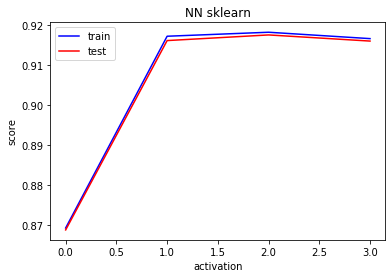

In [12]:
# graph results
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(range(len(activation_choice)), train_scores, test_scores, 'activation', 'NN sklearn')

Activation method: identity is bad. logistic, tanh and relu are similar.

## test hidden layer size

In [7]:
import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
hiden_layer_sizes_list = [50, 100, 200, 300] 
# hyperparameters - determined
activation = 'relu' # logistic, tanh are equally good. do not use identify

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

# declare output var
test_acc = []
train_acc = []
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()

from brainstation_capstone.ml.mlSOP import test_train_score_capture
# test hyperparameter
for parameter in hiden_layer_sizes_list:
    print(f'running {parameter}')
    # set up time
    timer.param_start()
    # start model
    model = MLPClassifier(activation=activation, hidden_layer_sizes=parameter)
    train_acc, test_acc = test_train_score_capture(model, data, train_acc, test_acc)
    test_acc = []
    train_acc = []
    timer.param_end()

# set up time
timer.session_end()
time_per_session = timer.get_time()

# get scores
print(train_acc)
print(test_acc)

loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3loading completed
timer starts
running 50
	Train Score: 0.912915625
	Test Score: 0.912815
	elapsed time 19.535min
running 100
	Train Score: 0.91660375
	Test Score: 0.9157825
	elapsed time 14.841min
running 200
	Train Score: 0.919261875
	Test Score: 0.9177675
	elapsed time 25.705min
running 300
	Train Score: 0.918421875
	Test Score: 0.9164925
	elapsed time 30.006min
total time: 90.087 min
[]
[]


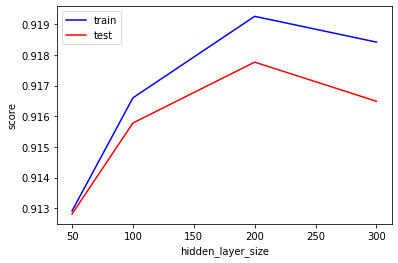

In [5]:
# plot
hyperparameter_list = [50, 100, 200, 300] 
train_score_list = [0.912915625, 0.91660375, 0.919261875, 0.918421875]
test_score_list = [0.912815, 0.9157825, 0.9177675, 0.9164925]
hyperparameter_name = 'hidden_layer_size'
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, hyperparameter_name)


Seems the gain from over 100 hidden layers isn't too much (at the scale of 0.01-0.06%), but takes a longer to train (20min vs 30min) as well as increased overfitting. Lets stick with below 50.

## test solver

loading 4 files
loading completed
timer starts
running lbfgs
	Train Score: 0.895605625
	Test Score: 0.895455
	elapsed time 2.154 min
running sgd
	Train Score: 0.91231875
	Test Score: 0.91214
	elapsed time 11.871 min
running adam
	Train Score: 0.912839375
	Test Score: 0.912585
	elapsed time 8.276 min
total time: 22.301 min
[0.895605625, 0.91231875, 0.912839375]
[0.895455, 0.91214, 0.912585]


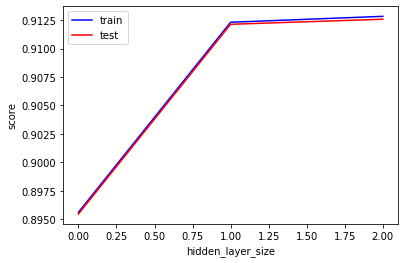

In [6]:
import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
hyperparameter_name = 'hidden_layer_size'
hyperparameter_list = ['lbfgs', 'sgd', 'adam'] # solver
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify

from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # modify this part ----
    model = MLPClassifier(activation=activation, hidden_layer_sizes=hiden_layer_sizes, solver=parameter)
    # modify this part ----
    model_acc.score_data(model, data)
    timer.param_end()
timer.session_end()
time_per_session = timer.get_time()
print(model_acc.train_acc)
print(model_acc.test_acc)
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


seems like solver sgd and adam are both good. adam being a little better but more overfit.

In [ ]:

import time
from sklearn.neural_network import MLPClassifier

# hyperparameters - testing
alpha = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparameter_name = 'alpha'
hyperparameter_list = alpha
solver = 'adam' # sgd is as good.
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
random_state = 318

# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])
# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {parameter}')
    timer.param_start()
    # update here
    model = MLPClassifier(random_state=random_state, activation=activation, hidden_layer_sizes=hiden_layer_sizes, solver=solver, alpha=parameter)
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


lower the alpha the better.

## learning rate

timer starts
running constant
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 10.101 min
running invscaling
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 9.704 min
running adaptive
	Train Score: 0.9140875
	Test Score: 0.9135375
	elapsed time 9.672 min
total time: 29.476 min


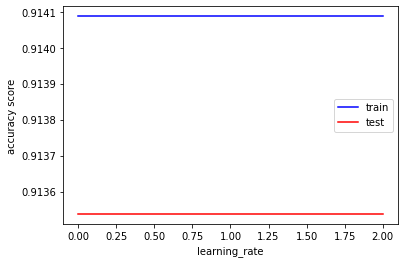

In [6]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
learning_rate = ['constant', 'invscaling', 'adaptive'] 
hyperparameter_name = 'learning_rate'
hyperparameter_list = learning_rate.copy()
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
learning_rate_init = 0.0001
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if solver=adam
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
shuffle = True
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000
# hyperparamter - tested
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, 
                            learning_rate=paramter,
                            batch_size=batch_size, 
                            learning_rate_init=learning_rate_init, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)


no difference in learning rate setting

In [ ]:
from sklearn.neural_network import MLPClassifier
# hyperparameters - testing
learning_rate_init = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
hyperparameter_name = 'learning_rate_init'
hyperparameter_list = learning_rate_init.copy()
# hyperparameter - to be tuned
max_iter = 200 # defines the number of epochs for sgd and adam
tol=1e-4
warm_start = False
# hyperparamter - only used if solver=adam or sdg
n_iter_no_change = 10
# hyperparamter - only used if solver=adam
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
shuffle = True
# hyperparamter - only used if early_stopping=True
validation_fraction = 0.1
early_stopping = False
# hyperparamter - only used if solver=sbg
momentum = 0.9
power_t = 0.5
nesterovs_momentum = True
# hyperparamter - only used if solver=lbfgs
batch_size = 'auto' # int
max_fun = 15000
# hyperparamter - tested
hiden_layer_sizes = 50 # stick with under 50
activation = 'relu' # logistic, tanh are equally good. do not use identify
solver = 'adam' # sgd is as good.
alpha = 0.0001 # lower can be better. tune later
random_state = 318
# learning_rate = ['constant', 'invscaling', 'adaptive'] # no difference

# declare output var
from brainstation_capstone.ml.mlSOP import test_model
model_acc = test_model()
# start timer
from brainstation_capstone.ml.mlSOP import ml_timer
timer = ml_timer()
# test hyperparameter
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = MLPClassifier(random_state=random_state, activation=activation,
                            hidden_layer_sizes=hiden_layer_sizes, solver=solver, 
                            alpha=alpha, 
                            # learning_rate=learning_rate,
                            batch_size=batch_size, 
                            learning_rate_init=parameter, 
                            power_t=power_t,
                            max_iter=max_iter, shuffle=shuffle, tol=tol,
                            warm_start=warm_start, momentum=momentum,
                            nesterovs_momentum=nesterovs_momentum,
                            early_stopping=early_stopping, 
                            validation_fraction=validation_fraction, 
                            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon,
                            n_iter_no_change=n_iter_no_change, max_fun=max_fun
                            )
    model_acc.score_data(model, data)
    timer.param_end()  
timer.session_end()
time_per_session = timer.get_time()
# graph
from brainstation_capstone.vs.plots import hyperparameterplot
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
